In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [38]:
data=pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [39]:
x1=data['SAT']
y=data['GPA']
y.shape

(84,)

In [40]:
x_matrix=x1.values.reshape(-1,1)


In [41]:
reg= LinearRegression()

In [42]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg.coef_

array([0.00165569])

In [44]:
reg.intercept_

0.2750402996602803

In [45]:
r2=reg.score(x_matrix,y)
r2

0.40600391479679765

In [46]:
x_matrix.shape

(84, 1)


n=x.shape[0]

In [47]:
n=x_matrix.shape[0]
p=x_matrix.shape[1]
p

1

In [48]:
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3987600600991976

In [49]:
f_regression(x_matrix,y)

(array([56.04804786]), array([7.19951844e-11]))

In [50]:
f_values=f_regression(x_matrix,y)[0]
p_values=f_regression(x_matrix,y)[1]

In [51]:
f_values.round(4)

array([56.048])

In [52]:
p_values.round(7)

array([0.])

In [53]:
reg_summary=pd.DataFrame(data=['SAT'],columns=['features'])
reg_summary

,features
0,SAT


In [54]:
reg_summary['Coefficient']=reg.coef_
reg_summary['p_values']=p_values.round(3)
reg_summary['f_values']=f_values

In [55]:
reg_summary

,features,Coefficient,p_values,f_values
0,SAT,0.001656,0.0,56.048048


Text(0, 0.5, 'GPA')

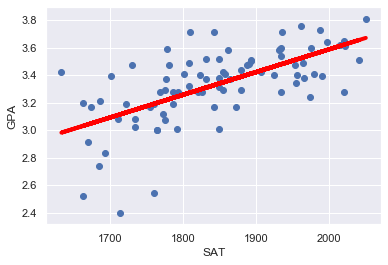

In [57]:
plt.scatter(x1,y)
yhat=0.001656*x1+0.2750402
fig=plt.plot(x1,yhat,lw=4,c='red',label='regression')
plt.xlabel('SAT')
plt.ylabel('GPA')